In [46]:
# CDS API
import cdsapi

# libraries for data manipulation
import numpy as np
import xarray as xr

# libraries for plotting and visualizing data
import matplotlib as mplt
import matplotlib.pyplot as plt
from matplotlib import animation

# disable warnings for data download via API and matplotlib
import urllib3 
urllib3.disable_warnings()
from warnings import filterwarnings
filterwarnings("ignore", category=UserWarning, module="matplotlib")

# this is needed to display graphics calculated outside of jupyter notebook
from IPython.display import HTML, display

In [47]:
URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = '******:****************************'

data_dir = 'yourdatadir/data'

In [48]:
# download era5 data for new zealand extent

c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'reanalysis-era5-land-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': '2m_temperature',
        'year': [
            '2022', '2023',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            -34, 165, -50,
            180,
        ],
        'format': 'netcdf',
    },
    f'{data_dir}nz_20222023.nc')

In [49]:
# open the data
data = xr.open_dataset("data/nz_20222023.nc")
data.variables.keys()
data

<xarray.Dataset>
Dimensions:    (longitude: 151, latitude: 161, expver: 2, time: 21)
Coordinates:
  * longitude  (longitude) float32 165.0 165.1 165.2 165.3 ... 179.8 179.9 180.0
  * latitude   (latitude) float32 -34.0 -34.1 -34.2 -34.3 ... -49.8 -49.9 -50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2023-09-01
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-19 13:55:59 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [50]:
# combine expver value 
data_combine = data.sel(expver=1).combine_first(data.sel(expver=5))
data_combine.load()
data_combine

<xarray.Dataset>
Dimensions:    (time: 21, latitude: 161, longitude: 151)
Coordinates:
  * longitude  (longitude) float32 165.0 165.1 165.2 165.3 ... 179.8 179.9 180.0
  * latitude   (latitude) float32 -34.0 -34.1 -34.2 -34.3 ... -49.8 -49.9 -50.0
  * time       (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2023-09-01
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-19 13:55:59 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [51]:
# convert kelvin to celsius
data_combine = data_combine['t2m'] - 273.15
data_combine = data_combine.assign_attrs(data.attrs)
data_combine.attrs['units'] = '°C'
data_combine

<xarray.DataArray 't2m' (time: 21, latitude: 161, longitude: 151)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 165.0 165.1 165.2 165.3 ... 179.8 179.9 180.0
  * latitude   (latitude) float32 -34.0 -34.1 -34.2 -34.3 ... -49.8 -49.9 -50.0
  * time       (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2023-09-01
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-19 13:55:59 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
    units:        °C

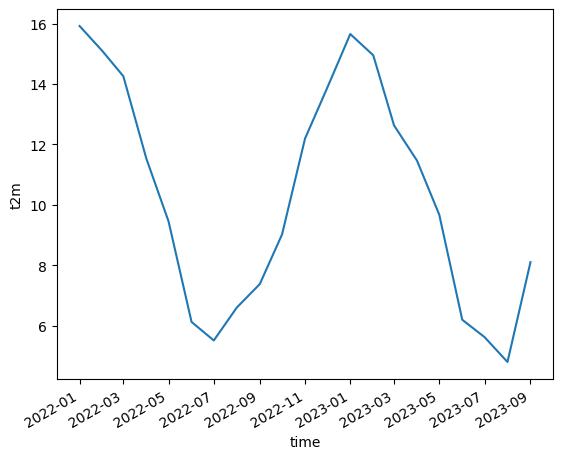

In [52]:
# test chart 
chart = data_combine.mean(['longitude','latitude']).plot()
plt.savefig(f"output/images/NZ_temp_chart.png")

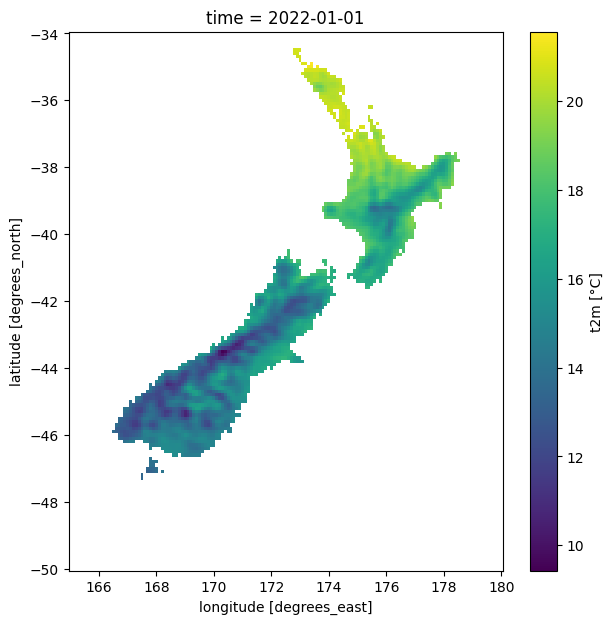

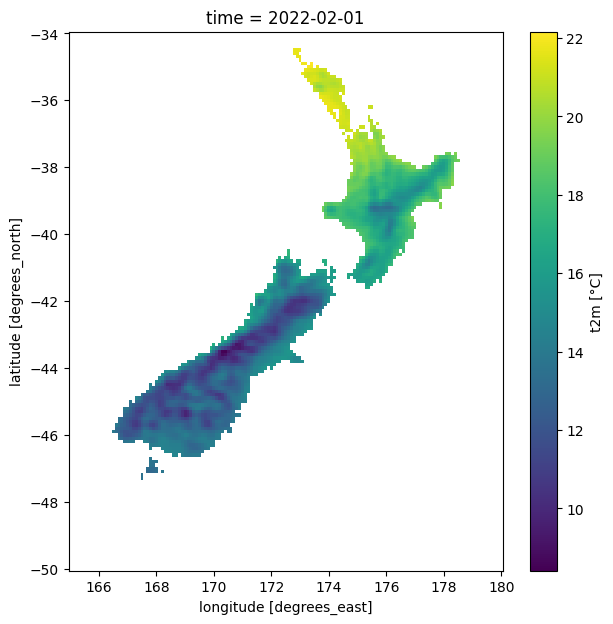

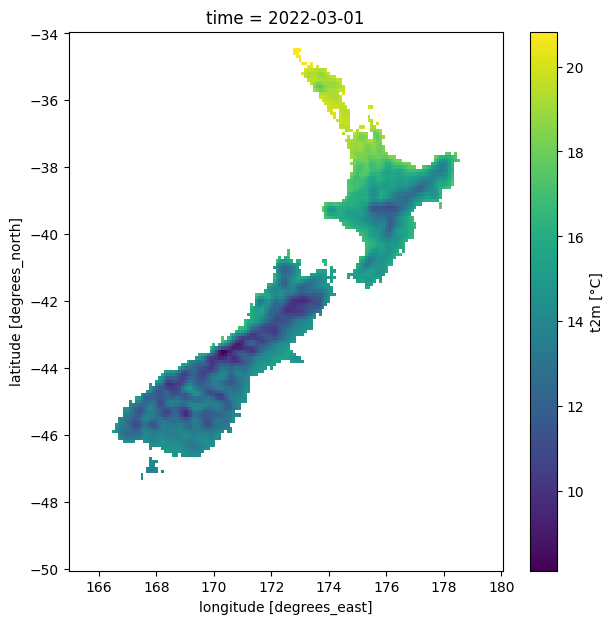

In [ ]:
# test plot 
for i in range(3): 
    data_combine[i,:,:].plot(figsize=(7,7))
    plt.show()
    plt.close()

In [ ]:
# some variables for visualization
font1 = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        }

font2 = {'family': 'sans serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 31,
        }

vmin = data_combine.min()
vmax = data_combine.max()
print("min_temp =", vmin)
print("max_temp =", vmax)


min_temp = <xarray.DataArray 't2m' ()>
array(-4.5865173, dtype=float32)
max_temp = <xarray.DataArray 't2m' ()>
array(22.165436, dtype=float32)


In [ ]:
for i in range(9,21):
    data_combine[i,:,:].plot(
        figsize = (7,9),
        vmin= vmin, vmax= vmax,
        cmap= mplt.colormaps['Spectral'].reversed(),    
        cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 1,
            'pad' : 0.0,
            'aspect': 55,
            'spacing': 'proportional',
            'label': 'Celsius Degree'
        }
    )
    plt.box(False)
    plt.suptitle("Monthly Temperature in New Zealand", fontdict = font1, fontsize = 20)
    plt.title(str(data_combine.coords['time'].values[i])[:10], fontdict = font2)
    plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    plt.xlabel("")
    plt.ylabel("")   
    plt.savefig(f"output/images/NZ_monthly_temp_{i:03}.png")
    plt.close()

In [1]:
# let's animate
for i in range(9, 21):
    data_combine[i,:,:].plot(
        figsize = (7,9),
        vmin= vmin, vmax= vmax,
        cmap= mplt.colormaps['Spectral'].reversed(),    
        cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 1,
            'pad' : 0.0,
            'aspect': 55,
            'spacing': 'proportional',
            'label': 'Celsius Degree'
        }
    )
    plt.close()

# get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(7,9))

# plot the initial frame
cax = data_combine[i,:,:].plot(
    add_colorbar=True,
    cmap= mplt.colormaps['Spectral'].reversed(),
    vmin= vmin, vmax= vmax,
    cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 1,
            'pad' : 0.0,
            'aspect': 55,
            'spacing': 'proportional',
            'label': 'Celsius Degree'
        }
)

# next we need to create a function that updates the values for the colormesh, as well as the title
def animate(i):
    plt.box(False)
    plt.suptitle("Monthly Temperature in New Zealand", fontdict = font1, fontsize = 20)
    plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    plt.xlabel("")
    plt.ylabel("")
    cax.set_array(data_combine[i,:,:].values.flatten())
    ax.set_title(str(data_combine.coords['time'].values[i])[:10], fontdict = font2)

# finally, we use the animation module to create the animation
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames = range(9,21),       # could also be iterable or list
    interval = 450     # ms between frames
)

NameError: name 'data_combine' is not defined

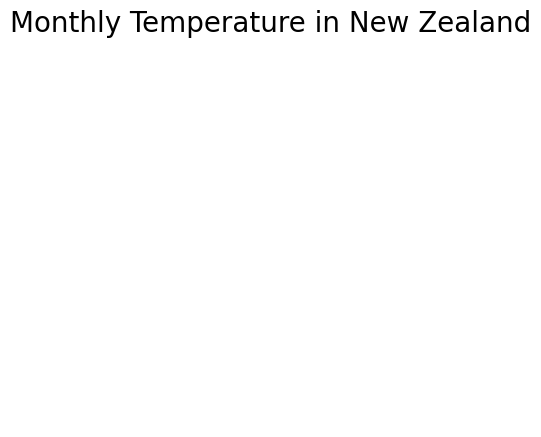

In [ ]:
# test animate
HTML(ani.to_jshtml())

MovieWriter ffmpeg unavailable; using Pillow instead.


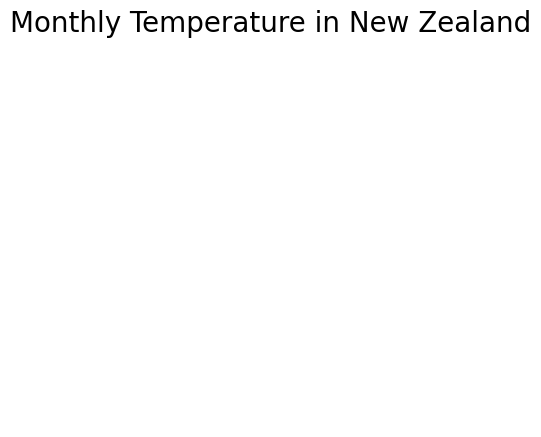

In [ ]:
# save as gif
ani.save('output/NZ_monthly_temp_20222023.gif')